# EDA

In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

In [88]:
DATA_FOLDER = './data/'

train = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))
items = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [89]:
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)
print('Items shape: ', items.shape)
print('Categories shape: ', categories.shape)
print('Shops shape: ', shops.shape)

Train shape:  (2935849, 6)
Test shape:  (214200, 3)
Items shape:  (22170, 3)
Categories shape:  (84, 2)
Shops shape:  (60, 2)


In [90]:
train.date = pd.to_datetime(train.date, format='%d.%m.%Y')
train = train.assign(revenue=transactions.item_price * transactions.item_cnt_day)

In [11]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [12]:
items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

In [13]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [14]:
categories.nunique()

item_category_name    84
item_category_id      84
dtype: int64

In [15]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [16]:
shops.nunique()

shop_name    60
shop_id      60
dtype: int64

In [91]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [93]:
train.nunique()

date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
revenue           24775
dtype: int64

In [94]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.157732e+03
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,5.683604e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,-6.897000e+04
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.490000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.490000e+02
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,1.078200e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,1.829990e+06


In [95]:
print(train.date.min(), train.date.max())
train.date.describe()

2013-01-01 00:00:00 2015-10-31 00:00:00


count                 2935849
unique                   1034
top       2013-12-28 00:00:00
freq                     9434
first     2013-01-01 00:00:00
last      2015-10-31 00:00:00
Name: date, dtype: object

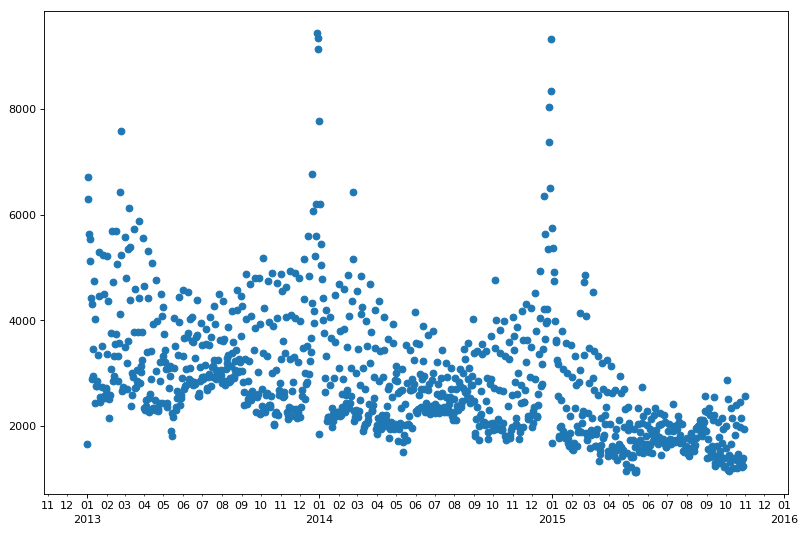

In [96]:
tdvc = train.date.value_counts()

fig, ax = plt.subplots(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
ax.scatter(tdvc.index, tdvc)
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_tick_params(which='major', pad=15)


In [37]:
train.isnull().nunique()

date              1
date_block_num    1
shop_id           1
item_id           1
item_price        1
item_cnt_day      1
dtype: int64

In [86]:
train[['date', 'date_block_num']].drop_duplicates().groupby('date_block_num').count()

,date
date_block_num,
0,31
1,28
2,31
3,30
4,31
5,30
6,31
7,31
8,30


In [97]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [98]:
print('Test shape: ', test.shape)

Test shape:  (214200, 3)


In [100]:
len(items)

22170

"Submissions are evaluated by root mean squared error (RMSE). True target values are clipped into [0,20] range."

and

"For each id in the test set, you must predict a total number of sales."

and

"Submission is for date_block_num 34"